<a href="https://colab.research.google.com/github/jeanneta/FinalAIKindleSentimentAnalysis/blob/main/FinalProject_H34075033_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeannetaolivia","key":"46bcea5bd1d7119889d5ad5b8c10c92a"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              229KB  2021-06-19 20:05:51           7886  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4794  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1620  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   1GB  2021-06-09 15:58:24           2261  
mathurinache/twitter-edge-nodes                               Tw

In [ ]:
!kaggle datasets download -d bharadwaj6/kindle-reviews

 95% 500M/525M [00:09<00:00, 36.7MB/s]
100% 525M/525M [00:09<00:00, 58.0MB/s]


In [ ]:
!unzip kindle-reviews.zip

Archive:  kindle-reviews.zip
  inflating: kindle_reviews.csv      
  inflating: kindle_reviews.json     


In [ ]:
import json
import csv
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/kindle_reviews.csv')


In [ ]:

df

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
...,...,...,...,...,...,...,...,...,...,...
982614,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600
982615,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600
982616,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600
982617,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600


In [ ]:
df = pd.read_csv('/content/kindle_reviews.csv', usecols=["reviewText", "overall"])


In [ ]:
df

,overall,reviewText
0,5,I enjoy vintage books and movies so I enjoyed ...
1,4,This book is a reissue of an old one; the auth...
2,4,This was a fairly interesting read. It had ol...
3,5,I'd never read any of the Amy Brewster mysteri...
4,4,"If you like period pieces - clothing, lingo, y..."
...,...,...
982614,5,Yasss hunny! This is a great read. That Dre is...
982615,5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...
982616,5,Great book! Cherika was a fool. She let that m...
982617,5,When I say this was an excellent book please b...


In [ ]:
df.shape

(982619, 2)

In [ ]:
df.isna().sum() #checking null

overall        0
reviewText    22
dtype: int64

In [ ]:
df.dropna(subset=['reviewText'], inplace=True) #droping null's in reviews


In [ ]:
df.isna().sum() # check again

overall       0
reviewText    0
dtype: int64

In [ ]:
df.info(verbose=True, null_counts=True) #to see the type of columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 982597 entries, 0 to 982618
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     982597 non-null  int64 
 1   reviewText  982597 non-null  object
dtypes: int64(1), object(1)
memory usage: 22.5+ MB


In [ ]:
df['overall'].value_counts()


5    575246
4    254010
3     96193
2     34130
1     23018
Name: overall, dtype: int64

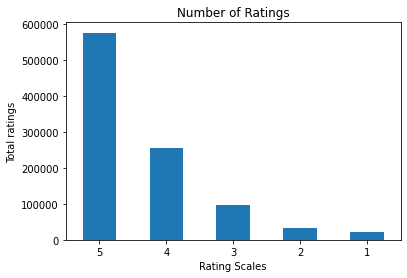

In [ ]:
import matplotlib.pyplot as plt
df.overall.value_counts().plot(kind = 'bar')
plt.title('Number of Ratings')
plt.xlabel('Rating Scales')
plt.xticks(rotation = 0)
plt.ylabel('Total ratings')
plt.show()

In [ ]:
# rating 1-4 as 0, others as 1
def calc_two_sentiment(overall):  
    if overall >= 5:
        return 1
    else:
        return 0


In [ ]:
df['sentiment'] = df['overall'].apply(calc_two_sentiment) # appyling converter to change sentiments


In [ ]:
df['sentiment'].value_counts()


1    575246
0    407351
Name: sentiment, dtype: int64

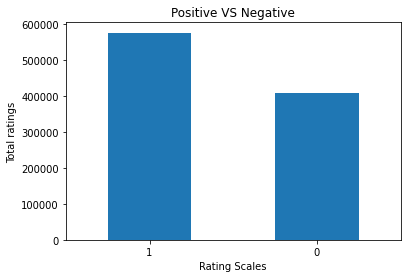

In [ ]:
df.sentiment.value_counts().plot(kind = 'bar')
plt.title('Positive VS Negative')
plt.xlabel('Rating Scales')
plt.xticks(rotation = 0)
plt.ylabel('Total ratings')
plt.show()

In [ ]:
df_0 = df.loc[df['sentiment']==0].head(10000)
df_1 = df.loc[df['sentiment']==1].head(10000)



In [ ]:
frames = [df_0, df_1]
#getting together samples
df_sampled = pd.concat(frames)
df_sampled['sentiment'].value_counts() #sample classes - balanced chosen


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# df_sampled

In [ ]:
import string
string.punctuation # to see punctuation library of string function

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    words_wo_punct= "".join([a for a in text if a not in string.punctuation])
    return words_wo_punct
df[ 'review_new' ] = df['reviewText'].apply(lambda x: remove_punctuation(x))
print(len(df))
df


982597


,overall,reviewText,sentiment,review_new
0,5,I enjoy vintage books and movies so I enjoyed ...,1,I enjoy vintage books and movies so I enjoyed ...
1,4,This book is a reissue of an old one; the auth...,0,This book is a reissue of an old one the autho...
2,4,This was a fairly interesting read. It had ol...,0,This was a fairly interesting read It had old...
3,5,I'd never read any of the Amy Brewster mysteri...,1,Id never read any of the Amy Brewster mysterie...
4,4,"If you like period pieces - clothing, lingo, y...",0,If you like period pieces clothing lingo you ...
...,...,...,...,...
982614,5,Yasss hunny! This is a great read. That Dre is...,1,Yasss hunny This is a great read That Dre is a...
982615,5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,1,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...
982616,5,Great book! Cherika was a fool. She let that m...,1,Great book Cherika was a fool She let that man...
982617,5,When I say this was an excellent book please b...,1,When I say this was an excellent book please b...


In [ ]:
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#removing words that is non alpha
df['review_new'] = df['review_new'].apply(lambda x: ' '.join(word for word in x.split() if word.isalpha()))

#making all words to be lowercase
df['review_new'] = df['review_new'].apply(lambda x: ' '.join(word.lower() for word in x.split()))

#list of stop words
stop = stopwords.words('english')

#removing the stop words
df['review_new'] = df['review_new'].apply(lambda x : ' '.join(word for word in x.split() if word not in stop))

lem = WordNetLemmatizer()
df['review_new'] = df['review_new'].apply(lambda x : ' '.join(lem.lemmatize(word, pos = 'v') for word in x.split()))

In [ ]:
df

,overall,reviewText,sentiment,review_new
0,5,I enjoy vintage books and movies so I enjoyed ...,1,enjoy vintage book movies enjoy read book plot...
1,4,This book is a reissue of an old one; the auth...,0,book reissue old one author bear era say nero ...
2,4,This was a fairly interesting read. It had ol...,0,fairly interest read old style terminologyi gl...
3,5,I'd never read any of the Amy Brewster mysteri...,1,id never read amy brewster mysteries one reall...
4,4,"If you like period pieces - clothing, lingo, y...",0,like period piece clothe lingo enjoy mystery a...
...,...,...,...,...
982614,5,Yasss hunny! This is a great read. That Dre is...,1,yasss hunny great read dre mess cherika refuse...
982615,5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,1,enjoy book begin end far lex hoe sneaky damn s...
982616,5,Great book! Cherika was a fool. She let that m...,1,great book cherika fool let man get away much ...
982617,5,When I say this was an excellent book please b...,1,say excellent book please believe definitely p...


In [ ]:

def make_xy(data, vec, n):
    temp = pd.DataFrame()
    for rating in range(2):
        temp = pd.concat([temp, data[data.sentiment == rating].sample(n, random_state = 42)], ignore_index = True)
        
    #vectorizing 
    X = vec.fit_transform(temp.review_new)
    y = temp.sentiment
    return X, y

In [ ]:
reviews = df
reviews.sentiment.value_counts()


1    575246
0    407351
Name: sentiment, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count = CountVectorizer()
X, y = make_xy(reviews, count, 50000)

In [ ]:
print(X.get_shape())
print(y.size)

(100000, 169115)
100000


In [ ]:
#using TfidfVectorizer
tfidf = TfidfVectorizer()
Xt, yt = make_xy(reviews, tfidf, 50000)

In [ ]:
# PAKE COUNTVECTORIZER YA 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 4, stratify = y)

nb = MultinomialNB()
nb.fit(X_train, y_train)
print('Training Accuracy: {:.2f}'.format(nb.score(X_train, y_train)))
print('Testing Accuracy: {:.2f}'.format(nb.score(X_test, y_test)))

Training Accuracy: 0.82
Testing Accuracy: 0.74


In [ ]:
# PAAKE TFIDF YA 
tfidf = TfidfVectorizer(min_df = .001)
Xt, yt = make_xy(reviews,tfidf, 50000)

X_train, X_test, y_train, y_test = train_test_split(Xt, yt, test_size = .3, random_state = 42, stratify = y)

nb = MultinomialNB(alpha = 5)
nb.fit(X_train, y_train)
naive_pred = nb.predict(X_test)
naive_prob = nb.predict_proba(X_test)[:,1]


print('Training Accuracy with TfidfVectorizer: {:.2f}'.format(nb.score(X_train, y_train)))
print('Testing Accuracy with TfidfVectorizer: {:.2f}'.format(nb.score(X_test, y_test)))

print('\n Classification Report: ')
print(classification_report(y_test, naive_pred))

Training Accuracy with TfidfVectorizer: 0.75
Testing Accuracy with TfidfVectorizer: 0.73

 Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.71      0.73     15000
           1       0.73      0.76      0.74     15000

    accuracy                           0.73     30000
   macro avg       0.73      0.73      0.73     30000
weighted avg       0.73      0.73      0.73     30000



In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((70000, 3910), (30000, 3910), (70000,), (30000,))